## The *Green* Metric

![Earth Environment](https://media.giphy.com/media/LRxBjX4hiysIAgFnpK/giphy.gif)

What makes a neighborhood great?

After some discussion our group decided to focus on the environmental aspect. Sure, crime rates, traffic speed, housing costs, et cetera are all important things to consider but In our opinion, the environmental features of a neighborhood triumphs all of those. thousands of studies have shows that exposure to nature is of great benefit to us. furthermore, it promotes ideas of conservation and the fight against climate change. 

In this notebook we will analyze 3 metrics:

1. Greenspaces
2. Smart Trash cans
3. Number of Trees

These all will contribute to an overall "green" metric that will determine the best neighborhood in the city of Pittsburgh. I hope you enjoy this investigation into the environmentalism of Pittsburgh.


In [1]:
# General imports for entire notebook
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

### Green Spaces

Green spaces are places in cities that are reserved for things such as parks, wildlife preservation, and evironmental preservation. A green space is not necessarily a literal "green" space (someone's front yard is not considered a green space), rather it is an area set aside by the city for environmental purposes. Green spaces are important in any urban setting, especially a heavily industrial area such as Pittsburgh. For a neighborhood to be considered an environmentally friendly place, green spaces are something that should be taken into account.

In [2]:
# opens the green space dataset
green_space_data = pd.read_csv("https://data.wprdc.org/dataset/cd9ae013-5b93-43d6-8793-bccf10f12c72/resource/b06fa202-ead7-491c-b8f6-2702dd35f8dd/download/opendata-pubworks-operations-green-spaces-2015.csv")
green_space_data = green_space_data.groupby("Neighborhood").sum() # finds sum of all values by neighborhood
green_space_data = green_space_data[['Total Acreage']] # narrows down the total acreage by neighborhood
green_space_data.head(len(green_space_data)) # displays data for every neighborhood

,Total Acreage
Neighborhood,
Beechview,0.10
Brookline,0.10
Central Business District,1.24
Central Oakland,1.70
Crawford Roberts,0.30
East Liberty,4.15
North Oakland,0.10
Point Breeze,1.12
Point Breeze North,1.40


The above dataframe represents the acreage, in total, of green space in each neighborhood. This is a good start, but it's only really useful if all the neighborhoods are similarly sized, which they definitely aren't. When analyzing data like this, it's important to take the total size in acres of each neighborhood, and use that to get a percentage of green space in the neighborhood.

To do this, we'll be using another dataset, this time a dataset that has general data for each neighborhood, such as the total acreage of each neighborhood.

In [3]:
# general data about every neighborhood in Pittsburgh
hood_data = pd.read_csv("https://data.wprdc.org/datastore/dump/668d7238-cfd2-492e-b397-51a6e74182ff")

hood_data = hood_data[['hood', 'acres']] # narrow down the data to just what i need

#merge the green space data and general neighborhood data for easy calculation
green_space_total_data = green_space_data.merge(hood_data, how='inner', left_on='Neighborhood', right_on='hood')

green_space_total_data['Green Percentage'] = (green_space_total_data['Total Acreage'] / green_space_total_data['acres']) * 100 # multiply by 100 for easy readability
green_space_total_data = green_space_total_data.sort_values(by = "Green Percentage", ascending = False)
green_space_total_data.head(len(green_space_total_data))

,Total Acreage,hood,acres,Green Percentage
4,4.15,East Liberty,373.650,1.110665
3,1.70,Central Oakland,180.883,0.939834
7,1.40,Point Breeze North,183.781,0.761776
2,1.24,Central Business District,411.593,0.301268
6,1.12,Point Breeze,645.695,0.173457
11,0.30,South Oakland,326.793,0.091801
5,0.10,North Oakland,320.679,0.031184
12,0.40,Squirrel Hill South,1717.485,0.023290
10,0.10,Sheraden,572.125,0.017479
13,0.05,Swisshelm Park,308.575,0.016204


Based on the data above, East Liberty has the highest proportion of green space to total acreage. It may seem like we only have data on the 14 neighborhoods above, however, the dataset keeps track of every green space in the city, and they all have a column describing which neighborhood they belong to. This means that the above data only looks barren because neighborhoods that have been excluded do not have any green spaces in them.

### Smart Cans

We'll be looking at a dataset that contains hundreds of smart trash cans in different neighborhoods accross Pittsburgh, in order to see which neighborhood has the most amount of smart trash cans.

The smart trash cans, that the city of Pittsburgh has employed, have built in sensors that detect how full it is. This innovation allows the labor force in Pittsburgh to not have to waste as much time on emptying trash can, and they can use that time to tidy up their respective areas. "'Based on our analysis, we expect that the smart litter cans will give us the ability to make process improvements that will reduce the amount of labor hours spent on emptying garbage cans by at least half,' said Matt Jacob, the project manager for the program for the Department of Innovation and Performance. 'As a result, DPW will be able to reallocate those resources to other tasks.'" (From source: https://pittsburghpa.gov/press-releases/press-releases.html?id=2986). 

First off, we will call in our data file to see how many smart trash cans are there within each neighborhood. 

In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

#Read in data and group it to get number of cans data
SmartTCans = pd.read_csv("SmartTCansNew.csv")
num_cans = pd.DataFrame(SmartTCans[["neighborhood", "Number of Cans"]])
num_cans = pd.DataFrame(num_cans.groupby("neighborhood").sum())
num_cans = num_cans.reset_index().sort_values(by="Number of Cans", ascending=False)
num_cans

,neighborhood,Number of Cans
57,Shadyside,77
25,East Liberty,68
66,Squirrel Hill South,64
8,Bloomfield,59
61,South Side Flats,56
...,...,...
23,East Carnegie,1
60,South Shore,1
46,Mt. Oliver,1
49,Northview Heights,1


However, this is metric alone won't tell us the full story; see, Shadyside, even though it has the most number of cans, has a large amount of area compared to other neighborhoods so it doesn't necessarily tell us if they are the most environmentally consious. To be environmentally consious, a neighborhood needs to fill as lot of their areas with smart trash cans so it can create a positive impact for the neighborhood as a whole. So, I created a new metric that is the percentage of smart trash cans per acres.  

In [5]:
#Reading in new data for acres
hood_data = pd.read_csv("Neighborhood data.csv")
#Getting acres
hood_data = hood_data[['hood', 'acres']]
# Change Perry North acreage to 775.68 (Was 0 in the data for some reason)
hood_data.iloc[[17],[1]] = 775.68
# Merge num_cans and acreage
cans_total_data = num_cans.merge(hood_data, how='left', left_on='neighborhood', right_on='hood')
cans_total_data = cans_total_data.drop("hood", axis = 1)
# Make the trash can percentage
cans_total_data['Trash can percentage'] = (cans_total_data['Number of Cans'] / cans_total_data['acres']) * 100
cans_total_data.sort_values(by="Trash can percentage", ascending=False)


,neighborhood,Number of Cans,acres,Trash can percentage
5,North Shore,52,195.014,26.664752
7,Central Oakland,39,180.883,21.560898
1,East Liberty,68,373.650,18.198849
34,Friendship,12,68.297,17.570318
14,East Allegheny,26,151.705,17.138525
...,...,...,...,...
69,Stanton Heights,2,472.615,0.423177
78,Windgap,1,266.678,0.374984
74,East Carnegie,1,277.895,0.359848
72,Swisshelm Park,1,308.575,0.324070


#### As you can see North Shore won this because they put a lot of trash cans out in relative to their area. 

### Number of Trees

Trees are such a valuable resource to any community. They provide shade, block noise, have been shown to reduce stress and frankly just look nice. I don't think anyone could argue that trees are a bad thing and in fact, there are some more concrete, quantitative evidence that adding trees to a neighborhood is beneficial as we will explore in this notebook.

*It should be noted that this data set only includes trees that are mangaed and upkept by the city of Pittsburgh.*

In [6]:
# Original Database. Way to many collumns that I don't need so shortened it
full_trees = pd.read_csv("https://data.wprdc.org/datastore/dump/1515a93c-73e3-4425-9b35-1cd11b2196da")
trees = full_trees[['common_name', 'height','condition','neighborhood','air_quality_benfits_total_dollar_value']].copy()
# This takes in neighborhood dataset from wprdc and shrinks it to just have a neighborhood ('hood') --> acres correlation
acres = pd.read_csv("https://data.wprdc.org/datastore/dump/668d7238-cfd2-492e-b397-51a6e74182ff")
acres = acres [['hood', 'acres']] 

trees.describe()

/opt/tljh/user/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,height,air_quality_benfits_total_dollar_value
count,41335.000000,40044.000000
mean,22.162235,7.370215
std,17.568577,7.382228
min,0.000000,0.000000
25%,9.000000,1.544349
50%,20.000000,4.862005
75%,35.000000,10.985833
max,158.000000,42.873431


## Trees are Important!
Looking at the overall description of the data, the impact of trees is clearly seen. In total, all the trees in Pittsburgh are offsetting negative air quality by over **forty thousand dollars**. 

Unfortunately, the source doesn't give a very specific description on what that dollar value means but no one can argue it is a bad thing. Note that the average dollar benefit per tree is 7 meaning that the more trees in a neighborhood the more it is benefiting the air. 

In the next code block we will find which neighborhood has the most trees per acre and as such will be the best neighborhood. 

In [7]:
# This shrinks the trees data set and then counts the occurances of each neighborhood to get trees per neighborhood
trees_per_neighborhood = full_trees [['neighborhood', 'id']] # neighborhood --> id correlation
trees_per_neighborhood = trees_per_neighborhood.rename({'id':'number_of_trees'}, axis = 1)
trees_per_neighborhood = trees_per_neighborhood.groupby('neighborhood').count()
trees_per_neighborhood.head()

,number_of_trees
neighborhood,
Allegheny Center,867
Allegheny West,386
Allentown,84
Arlington,107
Arlington Heights,5


Allegheny Center has the most trees of any neighborhood. But this isn't really a fair way to analyze the best neighborhood because obviously the large a neighborhood is the more space it has for trees. Instead, we must divide this number by the acreage for each neighborhood which we conveniently imported above. this will give a much more accurate look at the trees in a neighborhood.

In [8]:
#merges the acres data set with the trees_per_neighborhood for future caluculation
trees_per_acre_per_neighborhood = trees_per_neighborhood.merge(acres, how='inner', left_on='neighborhood',
                                                              right_on = 'hood')
trees_per_acre_per_neighborhood = trees_per_acre_per_neighborhood[['hood','number_of_trees','acres']]
trees_per_acre_per_neighborhood = trees_per_acre_per_neighborhood.rename({'hood':'neighborhood'}, axis=1)

#for some reason perry North (row 60) has 0 acres in the dataset so I manually found it on wikipedia
trees_per_acre_per_neighborhood.at[60, 'acres'] = 775.68  


# adds new colum wich divides num of trees by acres to get trees per acre (the final metric for this calculation)
trees_per_acre_per_neighborhood['trees_per_acre'] = trees_per_acre_per_neighborhood['number_of_trees'] / trees_per_acre_per_neighborhood['acres']
trees_per_acre_per_neighborhood = trees_per_acre_per_neighborhood.sort_values(by = 'trees_per_acre', ascending = False)


trees_per_acre_per_neighborhood.head(10)

,neighborhood,number_of_trees,acres,trees_per_acre
0,Allegheny Center,867,134.703,6.436382
33,Friendship,362,68.297,5.300379
1,Allegheny West,386,90.841,4.249183
18,Central Northside,674,166.475,4.048656
48,Manchester,707,179.566,3.937271
39,Highland Park,2941,747.691,3.933443
28,East Liberty,1366,373.650,3.655828
65,Regent Square,434,123.682,3.508999
23,Crawford-Roberts,568,166.101,3.419606
49,Marshall-Shadeland,488,148.209,3.292648


The table clearly shows that Allegheny Center contains the most trees given its size. In general, the neighborhood containing parks tend to have a much higher number of trees which intuitively makes sense. This is not an unfair comparison since I would argue that parks are a huge resource to any community and if a certain neighborhood has a lot of them then they have a lot of trees. Thus, the greatest number of trees would be the best neighborhood.In this case, that would be Allegheny Center. However, there are a couple other datasets to consider when choosing the "greenest" neighborhood which may take away Allegheny Center's lead.

### Making the *Green* Metric

We have looked at several similar yet discrete metrics relating to the city of pittsburgh *(if you haven't read the individual notebooks first, please do that before proceding)*. You have probably noticed that a common trend among our metrics is environmental support. We see this as a great method for deducing the "best" neighborhood because of how valuble the environment is. Especially in the city where pollution is at its highest and environmental areas become a well-sought-after resource. The following blocks will take the three environmental metrics and combine them into the "green" metric which will determine the true, best neighborhood in Pittsburgh.

In [9]:
# merging all dataframes into one table
green_metric = trees_per_acre_per_neighborhood.merge(cans_total_data, how = 'left', left_on = "neighborhood", right_on = 'neighborhood')
green_metric = green_metric.merge(green_space_total_data, how = "left", left_on = "neighborhood", right_on = "hood")

#droping columns not needed
green_metric = green_metric[["neighborhood", "trees_per_acre", "Trash can percentage", "Green Percentage"]]
#making any "NaN" vals 0 so we can calculate with them
green_metric["Green Percentage"] = green_metric["Green Percentage"].fillna(0)
green_metric["Trash can percentage"] = green_metric["Trash can percentage"].fillna(0)

### A note about scalars
While our metrics are share a similar theme, they have quite different units and range. For example, 40 smart trash cans in one neighborhood is quite high relative to other neighborhoods but 40 trees in a neighborhood is concerningly low. For this reason, we need to adjust some of our columns to give each metric an equal weight in the final metric. Admittedly our approach was a bit arbitrary, but we decided to scale up `cans_per_acre and` `gree_percentage` to match `trees_per_acre`.

We "*matched*" the values by looking at the describe function and making sure all the max and mins for each metric were *roughly* the same. this means the range was about the same, so each metric was equally contributing


In [10]:
#Applying Scalar of 10 to Green Space Percentage and scale of 50 for num cans to give an equal weight for all metrics
#Renaming columns accordingly
green_metric["Green Percentage"] = green_metric["Green Percentage"] * 10
green_metric = green_metric.rename(columns = {"Green Percentage" : "green_percentage_scaled_by_10","Trash can percentage":"cans_per_acre_scaled_by_50"})
#  divide by two because originally was multiplied by 100 in individual work in a prior code cell
green_metric["cans_per_acre_scaled_by_50"] = green_metric["cans_per_acre_scaled_by_50"] / 2
#Averaging all three vals into a new column "green_level" which is the final metric
green_metric["green_level"] = (green_metric["trees_per_acre"]+green_metric["cans_per_acre_scaled_by_50"]+green_metric["green_percentage_scaled_by_10"]) / 3

green_metric = green_metric.sort_values(by = "green_level", ascending = False)

In [11]:
green_metric.describe()

,trees_per_acre,cans_per_acre_scaled_by_50,green_percentage_scaled_by_10,green_level
count,90.000000,90.000000,90.000000,90.000000
mean,1.430589,2.251981,0.388808,1.357126
std,1.313650,2.772207,1.739413,1.507873
min,0.000889,0.000000,0.000000,0.000296
25%,0.468837,0.427290,0.000000,0.325512
50%,1.036309,1.214570,0.000000,0.863601
75%,2.106049,3.063186,0.000000,1.767919
max,6.436382,13.332376,11.106651,7.953968


In [12]:
green_metric.head(10)

,neighborhood,trees_per_acre,cans_per_acre_scaled_by_50,green_percentage_scaled_by_10,green_level
6,East Liberty,3.655828,9.099425,11.106651,7.953968
24,Central Oakland,2.034464,10.780449,9.398340,7.404418
20,North Shore,2.343421,13.332376,0.000000,5.225266
1,Friendship,5.300379,8.785159,0.000000,4.695179
2,Allegheny West,4.249183,7.705772,0.000000,3.984985
11,Point Breeze North,3.079753,0.544126,7.617762,3.747214
17,East Allegheny,2.577371,8.569263,0.000000,3.715544
8,Crawford-Roberts,3.419606,6.622477,0.000000,3.347361
10,Bloomfield,3.181179,6.535151,0.000000,3.238777
16,Shadyside,2.631295,6.502236,0.000000,3.044510


When combining all of our metrics, East Liberty comes out as the victor with Shadyside at a close second. East Liberty seems like a great choice relative to our metric because it contain high numbers of all our data sets. With a max of apprx. 6 trees/acre, 3.6 is a respectable score, 9 is one of the highest number of cans per acre in any neighborhood (Northshore with the actual highest) and same goes for Percent of green space. This makes East Liberty and excellent neighborhood for those who love nature and care about the envrionment. 

An imortant thing to note is that East Liberty is not the highest is all of our metrics but has a good mix of all three metrics which gives us the confidence to say...

# **East Liberty** is The Best Neighborhood in Pittsburgh

![Happy](https://media.giphy.com/media/artj92V8o75VPL7AeQ/giphy.gif)

#### graph looking at all the neighborhoods:

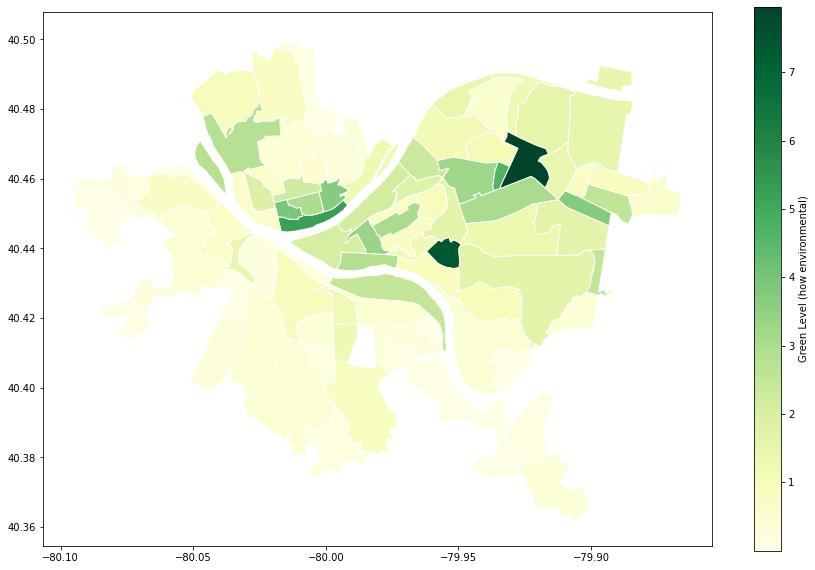

In [13]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
green_map = neighborhoods.merge(green_metric, how = 'left', left_on = "hood", right_on = "neighborhood")
green_map.plot(column = 'green_level',
               cmap = 'YlGn',
               edgecolor='white',
               legend=True,
               legend_kwds={'label' : "Green Level (how environmental)"},
               figsize=(15, 10))

# Conclusion
## 1: (Aleksandar Smith)
East Liberty won out both in terms of green spaces as well as the whole metric. This doesn't surprise me based on the numbers I got from the data, but I am a little surprised that East Liberty did so well in the other datasets. I don't really have a favorite neighborhood yet, I've only lived here for a few months and haven't really gotten around too much. If I had to pick a favorite, it would probably be Oakland, which also did pretty well in the data, specifically Central Oakland. I always appreciated how green Oakland seems as a whole, and if East Liberty is like that too, that would be pretty cool.
## 2: (Rohan Walia)
The neighborhood of East Liberty winning this comparison between our data is somewhat shocking, yet it makes a lot of sense as East Liberty is a small, quaint neighborhood that is relativley clean and environmentally consious. Therefore, by our data, it seems that East Liberty is the best neighborhood to live in. In the case of me, I believe in that as well, however in order to be fully locked in to that answer I need to spend more time in East Liberty as I've only gone there like once. Nevertheless, from what I've seen, East Liberty seems like the best neighborhood to live in Pittsburgh. 
## 3: (Ian Yencha)
I would preface this response by arguing that I haven't really been in Pittsburgh long enough to have a favorite. Despite this, I have been to East Liberty a couple times and it seemed like a very nice neighborhood. I am still partial to Oakland (especially considering it came in a close second) as that's what I'm most familiar with but I really like the metrics we choose. The envrionmental factor for a neighborhood adds a lot to a community and while something like smart trash bins may not seem important, they demonstrate how envrionmentally concious a neighborhood is. So, With a little more time in the city, this data could end up allighning with my personal preference.